In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from pct.nodes import PCTNode
from pct.functions import WeightedSum, Constant
from pct.hierarchy import PCTHierarchy


ModuleNotFoundError: No module named 'pct'

In [ ]:
#| include: false
from pct.functions import Proportional

## Creating a Hierarchy

Create a hierarchy by defining the number of rows (levels) and columns.

In [ ]:
pre=Constant(5, name='precon')
namespace=pre.namespace
post=Constant(10, name='postcon', namespace=namespace)
hpct = PCTHierarchy(3,3, pre=[pre], post=[post], history=True, clear_names=False, links="dense", namespace=namespace)
hpct.hierarchy


[[<pct.nodes.PCTNode>,
  <pct.nodes.PCTNode>,
  <pct.nodes.PCTNode>],
 [<pct.nodes.PCTNode>,
  <pct.nodes.PCTNode>,
  <pct.nodes.PCTNode>],
 [<pct.nodes.PCTNode>,
  <pct.nodes.PCTNode>,
  <pct.nodes.PCTNode>]]

In [ ]:
print(hpct.get_summary())

**************************
PRE: 5.000 
L0C0 0.000 0.000 0.000 0.000 
L0C1 0.000 0.000 0.000 0.000 
L0C2 0.000 0.000 0.000 0.000 
L1C0 0.000 0.000 0.000 0.000 
L1C1 0.000 0.000 0.000 0.000 
L1C2 0.000 0.000 0.000 0.000 
L2C0 0.000 0.000 0.000 0.000 
L2C1 0.000 0.000 0.000 0.000 
L2C2 0.000 0.000 0.000 0.000 
POST: 10.000 



In [ ]:
print(hpct.get_parameters_list())

[[[[5]], [[10]]], [[[[1, 1, 1]], [[0]], [[1]]], [[[1, 1, 1]], [[0]], [[1]]], [[[1, 1, 1]], [[0]], [[1]]]], [[[[1, 1, 1]], [[1, 1, 1]], [[1]]], [[[1, 1, 1]], [[1, 1, 1]], [[1]]], [[[1, 1, 1]], [[1, 1, 1]], [[1]]]], [[[[0]], [[1, 1, 1]], [[1]]], [[[0]], [[1, 1, 1]], [[1]]], [[[0]], [[1, 1, 1]], [[1]]]]]


In [ ]:
print(hpct.get_grid())

[3, 3, 3]


In [ ]:
hpct.change_namespace()

In [ ]:
hpct.summary()

**************************
pcthierarchy PCTHierarchy [3, 3, 3] ccff3ef2-036f-11f0-9f08-04d9f58727ab
--------------------------
PRE: precon Constant | 5 
Level 0 Cols 3
level0col0 PCTNode ccff3ef2-036f-11f0-9f08-04d9f58727ab
----------------------------
REF: weighted_sum WeightedSum | weights [1, 1, 1] | 0 | links  proportional3 proportional4 proportional5 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  weighted_sum variable 
OUT: proportional Proportional | gain 1 | 0 | links  subtract 
----------------------------
level0col1 PCTNode ccff3ef2-036f-11f0-9f08-04d9f58727ab
----------------------------
REF: weighted_sum1 WeightedSum | weights [1, 1, 1] | 0 | links  proportional3 proportional4 proportional5 
PER: variable1 Variable | 0 
COM: subtract1 Subtract | 0 | links  weighted_sum1 variable1 
OUT: proportional1 Proportional | gain 1 | 0 | links  subtract1 
----------------------------
level0col2 PCTNode ccff3ef2-036f-11f0-9f08-04d9f58727ab
----------------------------


In [ ]:
#FunctionsList.getInstance().report()    

Create a hierarchy from a configuration.

In [ ]:
config = hpct.get_config()
print(config)

{'type': 'PCTHierarchy', 'name': 'pcthierarchy', 'pre': {'pre0': {'type': 'Constant', 'name': 'precon', 'value': 5, 'links': {}}}, 'levels': {'level0': {'level': 0, 'nodes': {'col0': {'col': 0, 'node': {'type': 'PCTNode', 'name': 'level0col0', 'refcoll': {'0': {'type': 'WeightedSum', 'name': 'weighted_sum', 'value': 0, 'links': {0: 'proportional3', 1: 'proportional4', 2: 'proportional5'}, 'weights': [1, 1, 1]}}, 'percoll': {'0': {'type': 'Variable', 'name': 'variable', 'value': 0, 'links': {}}}, 'comcoll': {'0': {'type': 'Subtract', 'name': 'subtract', 'value': 0, 'links': {0: 'weighted_sum', 1: 'variable'}}}, 'outcoll': {'0': {'type': 'Proportional', 'name': 'proportional', 'value': 0, 'links': {0: 'subtract'}, 'gain': 1}}}}, 'col1': {'col': 1, 'node': {'type': 'PCTNode', 'name': 'level0col1', 'refcoll': {'0': {'type': 'WeightedSum', 'name': 'weighted_sum1', 'value': 0, 'links': {0: 'proportional3', 1: 'proportional4', 2: 'proportional5'}, 'weights': [1, 1, 1]}}, 'percoll': {'0': {'ty

In [ ]:
# h = PCTHierarchy.from_config(config, namespace=namespace)
h = PCTHierarchy.from_config(config)

In [ ]:
assert h.get_config() == hpct.get_config()

## Viewing a Hierarchy

The hierarchy details can be viewed as a summary. 

In [ ]:
hpct.get_node(2,0).get_function('reference').set_value(1)
hpct.get_node(2,1).get_function('reference').set_value(1)
hpct.get_node(2,2).get_function('reference').set_value(1)
for level in range(3):
    for col in range(3):
        hpct.get_node(level,col).get_function('output').set_property('gain', 10)
hpct.summary()

**************************
pcthierarchy PCTHierarchy [3, 3, 3] ccff3ef2-036f-11f0-9f08-04d9f58727ab
--------------------------
PRE: precon Constant | 5 
Level 0 Cols 3
level0col0 PCTNode ccff3ef2-036f-11f0-9f08-04d9f58727ab
----------------------------
REF: weighted_sum WeightedSum | weights [1, 1, 1] | 0 | links  proportional3 proportional4 proportional5 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  weighted_sum variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------
level0col1 PCTNode ccff3ef2-036f-11f0-9f08-04d9f58727ab
----------------------------
REF: weighted_sum1 WeightedSum | weights [1, 1, 1] | 0 | links  proportional3 proportional4 proportional5 
PER: variable1 Variable | 0 
COM: subtract1 Subtract | 0 | links  weighted_sum1 variable1 
OUT: proportional1 Proportional | gain 10 | 0 | links  subtract1 
----------------------------
level0col2 PCTNode ccff3ef2-036f-11f0-9f08-04d9f58727ab
---------------------------

The hierarchy details can be viewed as a configuration. That configuration can be used to create a hierarchy, as shown above.

In [ ]:
hpct.get_config()

{'type': 'PCTHierarchy',
 'name': 'pcthierarchy',
 'pre': {'pre0': {'type': 'Constant',
   'name': 'precon',
   'value': 5,
   'links': {}}},
 'levels': {'level0': {'level': 0,
   'nodes': {'col0': {'col': 0,
     'node': {'type': 'PCTNode',
      'name': 'level0col0',
      'refcoll': {'0': {'type': 'WeightedSum',
        'name': 'weighted_sum',
        'value': 0,
        'links': {0: 'proportional3', 1: 'proportional4', 2: 'proportional5'},
        'weights': [1, 1, 1]}},
      'percoll': {'0': {'type': 'Variable',
        'name': 'variable',
        'value': 0,
        'links': {}}},
      'comcoll': {'0': {'type': 'Subtract',
        'name': 'subtract',
        'value': 0,
        'links': {0: 'weighted_sum', 1: 'variable'}}},
      'outcoll': {'0': {'type': 'Proportional',
        'name': 'proportional',
        'value': 0,
        'links': {0: 'subtract'},
        'gain': 10}}}},
    'col1': {'col': 1,
     'node': {'type': 'PCTNode',
      'name': 'level0col1',
      'refcoll':

Get the output function, which will be the output function of the last node, or the last item of the post-processor functions, if present.

In [ ]:
link = hpct.get_output_function()
print(link.get_config())

{'type': 'Constant', 'name': 'postcon', 'value': 10, 'links': {}}


The hierarhcy can also be viewed graphically as a network of connected nodes.

In [ ]:
import os

In [ ]:
#| gui
import networkx as nx
ahpct = PCTHierarchy(2,2, links="dense")

test = 2
if test==1:
    g = ahpct.graph()
    pos=graphviz_layout(g, prog='dot')
    nx.draw(g, pos=pos, with_labels=True, font_size=12, font_weight='bold', node_color='red',  node_size=500)

if test ==2:
    g = ahpct.graph()
    pos = nx.multipartite_layout(g, subset_key="layer", align='horizontal')
    pos['constant1'][0]+=0.2
    c = pos['constant1'][0]
    print(c)
    nx.draw(g, pos=pos, with_labels=True, font_weight='bold', node_color='red',  node_size=750, arrowsize=25)

if test ==3:
    if os.name=='nt':        
        ahpct.draw(file="ahpct.png",  node_size=1500, figsize=(10,10))# with_labels=True, font_weight='bold', node_color='red',  node_size=500, arrowsize=25, align='vertical'

0.7454545454545454


## Running a hierarchy

The hierachy can be run once by calling itself. The verbose flag will print the computations to the screen.

In [ ]:
hpct(verbose=True)

5.000 
level0col0 0.000 0.000 0.000 0.000 
level0col1 0.000 0.000 0.000 0.000 
level0col2 0.000 0.000 0.000 0.000 
level1col0 0.000 0.000 0.000 0.000 
level1col1 0.000 0.000 0.000 0.000 
level1col2 0.000 0.000 0.000 0.000 
level2col0 1.000 0.000 1.000 10.000 
level2col1 1.000 0.000 1.000 10.000 
level2col2 1.000 0.000 1.000 10.000 
10.000 


10

A hierarchy can be executed with the "run()" method, providing the number of iterations to run. 

In [ ]:
hpct1 = PCTHierarchy(3,3, pre=[pre], post=[post], history=True, links="dense")
namespace=hpct1.namespace
hpct1.get_node(2,0).get_function('reference').set_value(1)
hpct1.get_node(2,1).get_function('reference').set_value(1)
hpct1.get_node(2,2).get_function('reference').set_value(1)
for level in range(3):
    for col in range(3):
        hpct1.get_node(level,col).get_function('output').set_property('gain', 10)

hpct1.run(10) 

10

## Viewing Data

If the hierarchy is created with the "history" flag equal to True, the data can be retrieved for each node. The node is accessed by specifying the row and column within the hierarchy. 

In [ ]:
print(hpct1.get_node(1,1).history.data)
assert hpct1.get_node(1,1).history.data == {'refcoll': {'weighted_sum6': [0.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]}, 'percoll': {'weighted_sum5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, 'comcoll': {'subtract4': [0.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]}, 'outcoll': {'proportional4': [0.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0]}}

{'refcoll': {'weighted_sum6': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30]}, 'percoll': {'weighted_sum5': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, 'comcoll': {'subtract4': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30]}, 'outcoll': {'proportional4': [0, 300, 300, 300, 300, 300, 300, 300, 300, 300]}}


## Save and Load

Save a hierarchy to file.

In [ ]:
import json

In [ ]:
hpct1.save("hpct.json")

Create a hierarchy from file.

In [ ]:
#loaded = PCTHierarchy.load("hpct.json", clear=False, namespace=namespace)
loaded = PCTHierarchy.load("hpct.json", clear=False)
loaded.summary()

**************************
pcthierarchy PCTHierarchy [3, 3, 3] ceb3566b-036f-11f0-894f-04d9f58727ab
--------------------------
PRE: precon Constant | 5 
Level 0 Cols 3
level0col0 PCTNode ceb3566b-036f-11f0-894f-04d9f58727ab
----------------------------
REF: weighted_sum WeightedSum | weights [1, 1, 1] | 900 | links  proportional3 proportional4 proportional5 
PER: variable Variable | 0 
COM: subtract Subtract | 900 | links  weighted_sum variable 
OUT: proportional Proportional | gain 10 | 9000 | links  subtract 
----------------------------
level0col1 PCTNode ceb3566b-036f-11f0-894f-04d9f58727ab
----------------------------
REF: weighted_sum1 WeightedSum | weights [1, 1, 1] | 900 | links  proportional3 proportional4 proportional5 
PER: variable1 Variable | 0 
COM: subtract1 Subtract | 900 | links  weighted_sum1 variable1 
OUT: proportional1 Proportional | gain 10 | 9000 | links  subtract1 
----------------------------
level0col2 PCTNode ceb3566b-036f-11f0-894f-04d9f58727ab
-------------

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

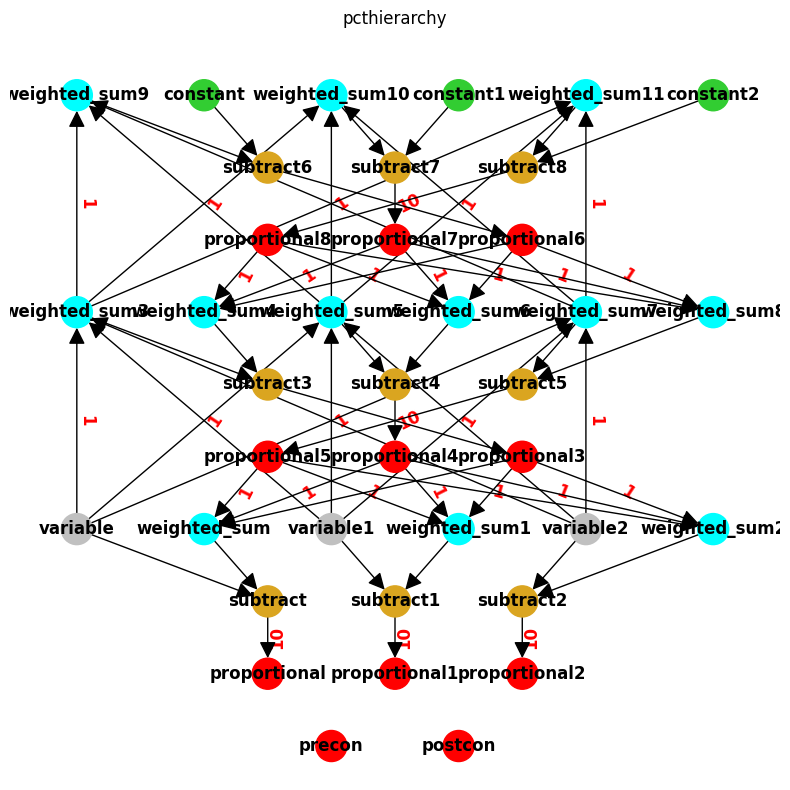

In [ ]:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
loaded.draw(with_edge_labels=True, color_mapping={'w':'aqua','c':'limegreen','s':'goldenrod', 'p':'red', 'v':'silver'})

###### Examples


Build a hierarchy by adding nodes and functions manually.

Create an empty hierarchy.

In [ ]:
myhpct = PCTHierarchy()
namespace=myhpct.namespace
myhpct.summary(build=False)

**************************
pcthierarchy PCTHierarchy [] cf9927d0-036f-11f0-8e9c-04d9f58727ab
--------------------------
PRE: None
POST: None
**************************


Add a node. Then nodes at particular positions.

In [ ]:
myhpct.add_node(PCTNode(namespace=namespace))
myhpct.add_node(PCTNode(namespace=namespace), level=1)
myhpct.add_node(PCTNode(namespace=namespace), level=0)
myhpct.summary(build=False)

**************************
pcthierarchy PCTHierarchy [2, 1] cf9927d0-036f-11f0-8e9c-04d9f58727ab
--------------------------
PRE: None
Level 0 Cols 2
pctnode2 PCTNode cf9927d0-036f-11f0-8e9c-04d9f58727ab
----------------------------
REF: constant2 Constant | 0 
PER: variable2 Variable | 0 
COM: subtract2 Subtract | 0 
OUT: proportional2 Proportional | gain 1 | 0 
----------------------------
pctnode PCTNode cf9927d0-036f-11f0-8e9c-04d9f58727ab
----------------------------
REF: constant Constant | 0 
PER: variable Variable | 0 
COM: subtract Subtract | 0 
OUT: proportional Proportional | gain 1 | 0 
----------------------------
Level 1 Cols 1
pctnode1 PCTNode cf9927d0-036f-11f0-8e9c-04d9f58727ab
----------------------------
REF: constant1 Constant | 0 
PER: variable1 Variable | 0 
COM: subtract1 Subtract | 0 
OUT: proportional1 Proportional | gain 1 | 0 
----------------------------
POST: None
**************************


Replace functions at particular positions in the hierarchy.

In [ ]:
myhpct.insert_function(level=0, col=0, collection="perception", function=Proportional(3, name="prop2", namespace=namespace))
myhpct.insert_function(level=1, col=0, collection="perception", function=WeightedSum(weights=[1,1], name="wsum", namespace=namespace))
myhpct.insert_function(level=0, col=1, collection="reference", function=Proportional(1, name="passthru", namespace=namespace))

Add pre and post processor functions.

In [ ]:
myhpct.add_preprocessor(Constant(1, name="cons1", namespace=namespace))
myhpct.add_preprocessor(Proportional(5, name="prop1", namespace=namespace))
myhpct.add_postprocessor(Proportional(5, name="postprop1", namespace=namespace))
myhpct.add_postprocessor(Proportional(5, name="postprop2", namespace=namespace))

Link the functions together.

In [ ]:
myhpct.set_links("prop1", "cons1")
myhpct.set_links("prop2", "prop1")
myhpct.add_links("wsum", "prop2", "variable")
myhpct.set_links("passthru", "proportional1")
myhpct.set_links("postprop1", "proportional")
myhpct.set_links("postprop2", "postprop1")

In [ ]:
myhpct.get_node(0,0).get_function('reference').set_value(1)
myhpct.get_node(1,0).get_function('reference').set_value(1)
myhpct.get_node(0,0).get_function('output').set_property('gain', 10)
myhpct.get_node(0,1).get_function('output').set_property('gain', 10)
myhpct.get_node(1,0).get_function('output').set_property('gain', 10)
myhpct.summary(build=True)

**************************
pcthierarchy PCTHierarchy [2, 1] cf9927d0-036f-11f0-8e9c-04d9f58727ab
--------------------------
PRE: cons1 Constant | 1 
prop1 Proportional | gain 5 | 0 | links  cons1 
Level 0 Cols 2
pctnode2 PCTNode cf9927d0-036f-11f0-8e9c-04d9f58727ab
----------------------------
REF: constant2 Constant | 1 
PER: prop2 Proportional | gain 3 | 0 | links  prop1 
COM: subtract2 Subtract | 0 | links  constant2 prop2 
OUT: proportional2 Proportional | gain 10 | 0 | links  subtract2 
----------------------------
pctnode PCTNode cf9927d0-036f-11f0-8e9c-04d9f58727ab
----------------------------
REF: passthru Proportional | gain 1 | 0 | links  proportional1 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  passthru variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------
Level 1 Cols 1
pctnode1 PCTNode cf9927d0-036f-11f0-8e9c-04d9f58727ab
----------------------------
REF: constant1 Constant | 1 
PER: wsum WeightedSum | w

In [ ]:
myhpctconfig = myhpct.get_config()
#print(myhpctconfig)
assert myhpctconfig == {'type': 'PCTHierarchy', 'name': 'pcthierarchy', 'pre': {'pre0': {'type': 'Constant', 'name': 'cons1', 'value': 1, 'links': {}}, 'pre1': {'type': 'Proportional', 'name': 'prop1', 'value': 0, 'links': {0: 'cons1'}, 'gain': 5}}, 'levels': {'level0': {'level': 0, 'nodes': {'col0': {'col': 0, 'node': {'type': 'PCTNode', 'name': 'pctnode2', 'refcoll': {'0': {'type': 'Constant', 'name': 'constant2', 'value': 1, 'links': {}}}, 'percoll': {'0': {'type': 'Proportional', 'name': 'prop2', 'value': 0, 'links': {0: 'prop1'}, 'gain': 3}}, 'comcoll': {'0': {'type': 'Subtract', 'name': 'subtract2', 'value': 0, 'links': {0: 'constant2', 1: 'prop2'}}}, 'outcoll': {'0': {'type': 'Proportional', 'name': 'proportional2', 'value': 0, 'links': {0: 'subtract2'}, 'gain': 10}}}}, 'col1': {'col': 1, 'node': {'type': 'PCTNode', 'name': 'pctnode', 'refcoll': {'0': {'type': 'Proportional', 'name': 'passthru', 'value': 0, 'links': {0: 'proportional1'}, 'gain': 1}}, 'percoll': {'0': {'type': 'Variable', 'name': 'variable', 'value': 0, 'links': {}}}, 'comcoll': {'0': {'type': 'Subtract', 'name': 'subtract', 'value': 0, 'links': {0: 'passthru', 1: 'variable'}}}, 'outcoll': {'0': {'type': 'Proportional', 'name': 'proportional', 'value': 0, 'links': {0: 'subtract'}, 'gain': 10}}}}}}, 'level1': {'level': 1, 'nodes': {'col0': {'col': 0, 'node': {'type': 'PCTNode', 'name': 'pctnode1', 'refcoll': {'0': {'type': 'Constant', 'name': 'constant1', 'value': 1, 'links': {}}}, 'percoll': {'0': {'type': 'WeightedSum', 'name': 'wsum', 'value': 0, 'links': {0: 'prop2', 1: 'variable'}, 'weights': [1.0, 1.0]}}, 'comcoll': {'0': {'type': 'Subtract', 'name': 'subtract1', 'value': 0, 'links': {0: 'constant1', 1: 'wsum'}}}, 'outcoll': {'0': {'type': 'Proportional', 'name': 'proportional1', 'value': 0, 'links': {0: 'subtract1'}, 'gain': 10}}}}}}}, 'post': {'post0': {'type': 'Proportional', 'name': 'postprop1', 'value': 0, 'links': {0: 'proportional'}, 'gain': 5}, 'post1': {'type': 'Proportional', 'name': 'postprop2', 'value': 0, 'links': {0: 'postprop1'}, 'gain': 5}}}

Define the order in which the node will be processed.

In [ ]:
myhpct.set_order(["pctnode2", "pctnode1", "pctnode"])

Run the hierarchy once.

In [ ]:
out = myhpct(verbose=True)
print(out)
assert out == -35000

1.000 5.000 
pctnode2 1.000 15.000 -14.000 -140.000 
pctnode1 1.000 15.000 -14.000 -140.000 
pctnode -140.000 0.000 -140.000 -1400.000 
-7000.000 -35000.000 
-35000


In [ ]:
# config =  {'type': 'Individual', 'name': 'pcthierarchy', 'pre': {'pre0': {'type': 'CartPoleV1', 'name': 'CartPoleV1', 'value': [0.03498833197860944, 0.20994561633454428, 0.012668159509212712, -0.2705237130920193, 0.047656152654718356], 'links': {0: 'Action1'}, 'env_name': 'CartPole-v1', 'reward': 1.0, 'done': False, 'info': {}}, 'pre1': {'type': 'IndexedParameter', 'name': 'ICV', 'value': 0.20994561633454428, 'links': {0: 'CartPoleV1'}, 'index': 1}, 'pre2': {'type': 'IndexedParameter', 'name': 'ICP', 'value': 0.03498833197860944, 'links': {0: 'CartPoleV1'}, 'index': 0}, 'pre3': {'type': 'IndexedParameter', 'name': 'IPV', 'value': -0.2705237130920193, 'links': {0: 'CartPoleV1'}, 'index': 3}, 'pre4': {'type': 'IndexedParameter', 'name': 'IPA', 'value': 0.012668159509212712, 'links': {0: 'CartPoleV1'}, 'index': 2}}, 'levels': {'level0': {'level': 0, 'nodes': {'col0': {'col': 0, 'node': {'type': 'PCTNode', 'name': 'L0C0', 'refcoll': {'0': {'type': 'EAConstant', 'name': 'RL0C0', 'value': 0, 'links': {}}}, 'percoll': {'0': {'type': 'EAWeightedSum', 'name': 'PL0C0', 'value': -0.2705237130920193, 'links': {0: 'ICV', 1: 'ICP', 2: 'IPV', 3: 'IPA'}, 'weights': [0, 0, 1, 0]}}, 'comcoll': {'0': {'type': 'Subtract', 'name': 'CL0C0', 'value': 0.2705237130920193, 'links': {0: 'RL0C0', 1: 'PL0C0'}}}, 'outcoll': {'0': {'type': 'EAProportional', 'name': 'OL0C0', 'value': -0.05046166000036782, 'links': {0: 'CL0C0'}, 'gain': -0.1865332226280776}}}}}}}, 'post': {'post0': {'type': 'EAWeightedSum', 'name': 'Action1', 'value': -0.005282911840894066, 'links': {0: 'OL0C0'}, 'weights': [0.10469159835121472]}}}
# ind = PCTHierarchy.from_config(config)

In [ ]:
from pct.errors import RootSumSquaredError, TotalError

er = RootSumSquaredError()
te = TotalError(error_response=er, limit=250,min=True)   
te.add_error_data([1, 2])
print(te)


hpct = PCTHierarchy(1,1,error_collector=te)
hpct.run(steps=5, verbose=True)


err=te.error()
print(err)


TotalError limit:250, limit_exceeded:False, : RootSumSquaredError error_response:2.23606797749979
[0] 
level0col0 0.000 0.000 0.000 0.000 

Current score=2.23606797749979
[1] 
level0col0 0.000 0.000 0.000 0.000 

Current score=2.23606797749979
[2] 
level0col0 0.000 0.000 0.000 0.000 

Current score=2.23606797749979
[3] 
level0col0 0.000 0.000 0.000 0.000 

Current score=2.23606797749979
[4] 
level0col0 0.000 0.000 0.000 0.000 

Current score=2.23606797749979
2.23606797749979


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()